# Desafio - Exploratory Data Analysis

#### Hipóteses: H1 - Existe alguma predominância de sexo nos consumidores? H2 - Qual a faixa etária mais frequente entre os consumidores? H3 - Quais são os problemas mais frequentes? H4 - Quais são os principais meios de contratação do serviço? H5 - Quais são os principais concorrentes desse serviço? H6 - A quarentena afetou esse serviço?


In [1]:
# Importa as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuração para o matplotlib
%matplotlib inline

In [3]:
# Lê os arquivos CSV
df1 = pd.read_csv('2020-01.csv', sep=';', encoding='latin1') 
df2 = pd.read_csv('2020-02.csv', sep=';', encoding='latin1')
df3 = pd.read_csv('2020-03.csv', sep=';', encoding='latin1')
df4 = pd.read_csv('2020-04.csv', sep=';', encoding='latin1')
df5 = pd.read_csv('2020-05.csv', sep=';', encoding='latin1')
df6 = pd.read_csv('2020-06.csv', sep=';', encoding='latin1')
df7 = pd.read_csv('2020-07.csv', sep=';', encoding='latin1')

In [4]:
list_columns = ['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Total']

In [5]:
# Une os dados em um dataset único
_ = df1.merge(df2, how='outer', on=list_columns)
_ = _.merge(df3, how='outer', on=list_columns)
_ = _.merge(df4, how='outer', on=list_columns)
_ = _.merge(df5, how='outer', on=list_columns)
_ = _.merge(df6, how='outer', on=list_columns)
df = _.merge(df7, how='outer', on=list_columns)

### Início da Análise

In [6]:
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,S,PR,Curitiba,F,entre 31 a 40 anos,01/01/2020,10.0,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",SMS / Mensagem de texto,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,S,PR,São José dos Pinhais,F,entre 21 a 30 anos,01/01/2020,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Contrato / Oferta,Alteração de plano/contrato sem solicitação ou...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,ES,Serra,M,entre 41 a 50 anos,03/01/2020,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,SE,SP,Jundiaí,M,entre 31 a 40 anos,04/01/2020,9.0,Americanas.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,S,RS,Porto Alegre,M,entre 61 a 70 anos,07/01/2020,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1


In [7]:
df.shape

(631967, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631967 entries, 0 to 631966
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Região                  631967 non-null  object 
 1   UF                      631967 non-null  object 
 2   Cidade                  631967 non-null  object 
 3   Sexo                    631967 non-null  object 
 4   Faixa Etária            631967 non-null  object 
 5   Data Finalização        631967 non-null  object 
 6   Tempo Resposta          625128 non-null  float64
 7   Nome Fantasia           631967 non-null  object 
 8   Segmento de Mercado     631967 non-null  object 
 9   Área                    631967 non-null  object 
 10  Assunto                 631967 non-null  object 
 11  Grupo Problema          631967 non-null  object 
 12  Problema                631967 non-null  object 
 13  Como Comprou Contratou  631967 non-null  object 
 14  Procurou Empresa    

In [9]:
# Verifica a existência de dados faltantes no dataset
df.isna().sum()

Região                         0
UF                             0
Cidade                         0
Sexo                           0
Faixa Etária                   0
Data Finalização               0
Tempo Resposta              6839
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação           0
Nota do Consumidor        279201
Total                          0
dtype: int64

In [10]:
# Transforma a coluna Data Finalização em datetime
df['Data Finalização'] = pd.to_datetime(df['Data Finalização'], format='%d/%m/%Y')

In [11]:
# Adiciona a coluna Mês
df['Mês'] = df['Data Finalização'].dt.strftime('%m').astype('int')

In [12]:
# Define dataset de consumidores de internet móvel
internet = df[df['Assunto'] == 'Internet Móvel']

In [13]:
internet.shape

(11815, 21)

### H1 - Existe alguma predominância de sexo nos consumidores? 

In [14]:
internet['Sexo'].value_counts() / internet.shape[0] * 100

M    59.940753
F    40.059247
Name: Sexo, dtype: float64

Text(0.5, 1.0, 'Reclamações - Internet Móvel')

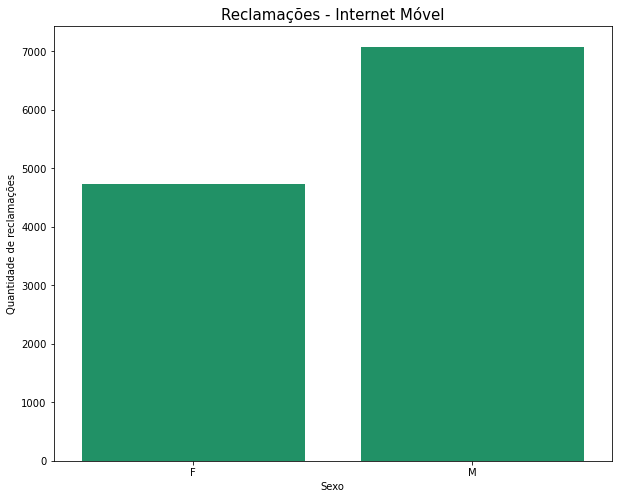

In [15]:
plt.figure(figsize=(10,8))
ax = sns.barplot(internet['Sexo'].value_counts().index, internet['Sexo'].value_counts(), color='#0fa36b', order=['F', 'M'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade de reclamações')
plt.title('Reclamações - Internet Móvel', size=15)

#### Sim. A partir dos dados de sexo, verifica-se que 60% dos consumidores que fizeram alguma reclamação de Internet Móvel são homens.

### H2 - Qual a faixa etária mais frequente entre os consumidores?

In [16]:
internet['Faixa Etária'].mode()

0    entre 31 a 40 anos
dtype: object

In [17]:
internet['Faixa Etária'].value_counts() / internet.shape[0] * 100

entre 31 a 40 anos    33.228946
entre 21 a 30 anos    30.892933
entre 41 a 50 anos    17.325434
entre 51 a 60 anos     9.462548
entre 61 a 70 anos     4.705882
até 20 anos            2.589928
mais de 70 anos        1.794329
Name: Faixa Etária, dtype: float64

Text(0.5, 1.0, 'Faixa etária dos consumidores')

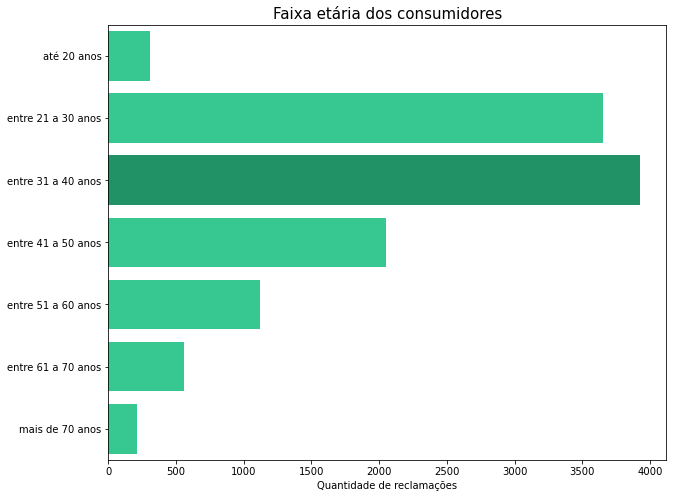

In [18]:
plt.figure(figsize=(10,8))
ax = sns.barplot(internet['Faixa Etária'].value_counts(), internet['Faixa Etária'].value_counts().index,
                 orient='h', order=[
                     'até 20 anos', 'entre 21 a 30 anos', 'entre 31 a 40 anos', 'entre 41 a 50 anos', 
                       'entre 51 a 60 anos', 'entre 61 a 70 anos', 'mais de 70 anos'],
                palette=['#1fe097', '#1fe097', '#0fa36b', '#1fe097', '#1fe097', '#1fe097', '#1fe097'])
plt.xlabel('Quantidade de reclamações')
plt.title('Faixa etária dos consumidores', size=15)

#### A faixa etária média mais frequente entre os consumidores que fizeram alguma reclamação é entre 31 a 40 anos. Mas será que existe diferença entre homens e mulheres?

In [19]:
internet.groupby('Sexo')['Faixa Etária'].describe()

,count,unique,top,freq
Sexo,,,,
F,4733,7,entre 31 a 40 anos,1420
M,7082,7,entre 31 a 40 anos,2506


Text(0.5, 1.0, 'Faixa etária dos consumidores por sexo')

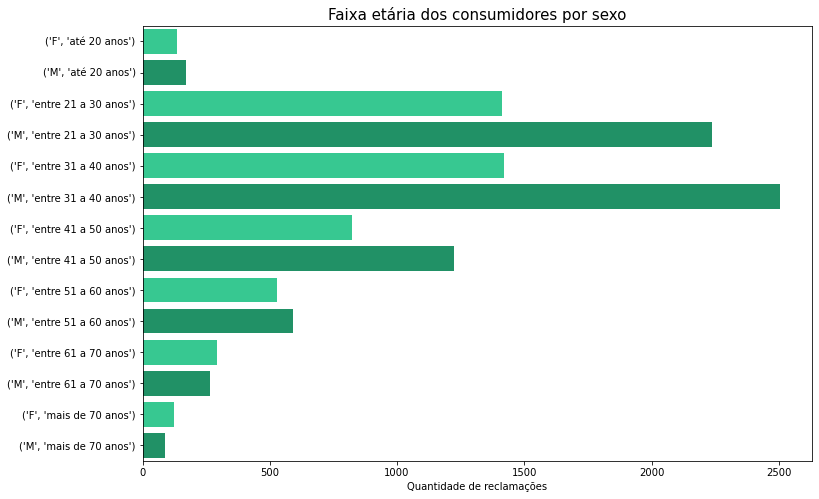

In [20]:
plt.figure(figsize=(12,8))
_ = internet.groupby('Sexo')['Faixa Etária'].value_counts()
sns.barplot(x=_, y=_.index, orient='h', palette=['#1fe097', '#0fa36b'], order=[
                     ('F','até 20 anos'), ('M', 'até 20 anos'), ('F','entre 21 a 30 anos'), ('M','entre 21 a 30 anos'),
    ('F','entre 31 a 40 anos'), ('M','entre 31 a 40 anos'), ('F','entre 41 a 50 anos'), ('M','entre 41 a 50 anos'), 
    ('F', 'entre 51 a 60 anos'), ('M', 'entre 51 a 60 anos'), ('F','entre 61 a 70 anos'), ('M', 'entre 61 a 70 anos'),
    ('F','mais de 70 anos'), ('M', 'mais de 70 anos')])
plt.xlabel('Quantidade de reclamações')
plt.title('Faixa etária dos consumidores por sexo', size=15)

#### A faixa etária mais frequente é entre 31 a 40 anos para ambos os sexos. Além disso, o gráfico mostra um comportamento interessante. Até a faixa etária de 61 anos, há predominância de homens. A partir de 61 anos, o sexo feminino apresenta maiores números. Isso pode estar relacionado à maior expectativa de vida entre as mulheres. 

### H3 - Quais são os problemas mais frequentes?

In [21]:
internet['Grupo Problema'].value_counts() / internet.shape[0] * 100

Cobrança / Contestação    44.841303
Contrato / Oferta         21.811257
Vício de Qualidade        16.826069
Atendimento / SAC         14.845535
Informação                 1.675836
Name: Grupo Problema, dtype: float64

Text(0.5, 1.0, 'Problemas mais frequentes - Internet Móvel')

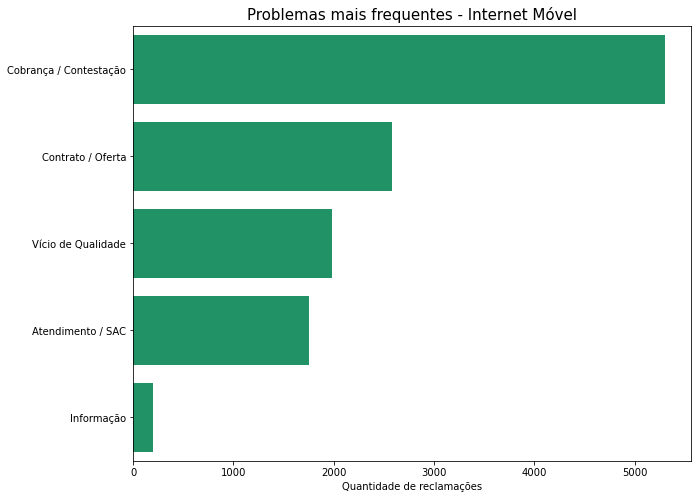

In [22]:
plt.figure(figsize=(10,8))
ax = sns.barplot(internet['Grupo Problema'].value_counts(), internet['Grupo Problema'].value_counts().index,
                 color='#0fa36b', orient='h')
plt.xlabel('Quantidade de reclamações')
plt.title('Problemas mais frequentes - Internet Móvel', size=15)

#### Cerca de 45% das reclamações são a respeito do grupo de problema cobrança. Vamos analisar melhor esse grupo:

In [23]:
cobranca = internet[internet['Grupo Problema'] == 'Cobrança / Contestação']
cobranca['Problema'].value_counts() / cobranca.shape[0] * 100

Cobrança indevida / abusiva para alterar ou cancelar o contrato                         28.029445
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado          21.593054
Cobrança após cancelamento do serviço                                                   20.592676
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo       11.136278
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                     6.625142
Negativação indevida (SPC, Serasa, SCPC etc)                                             4.983012
Renegociação / parcelamento de dívida                                                    2.925632
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores     2.321631
Cobrança submetendo a ofensa, constrangimento ou ameaça                                  1.094753
Não envio / atraso do boleto ou fatura / dificuldade com o pagamento                     0.698377
Name: Problema, dtyp

Text(0.5, 1.0, 'Problemas com cobrança - Internet Móvel')

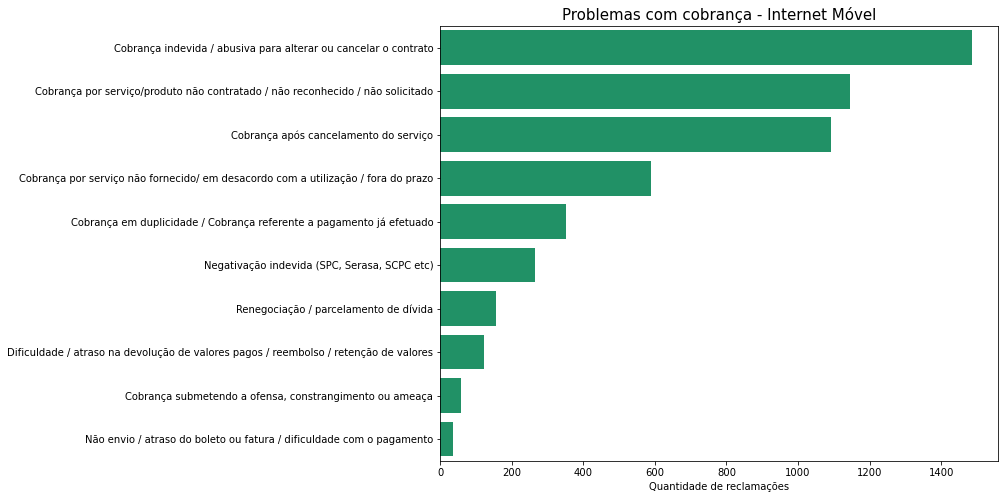

In [24]:
plt.figure(figsize=(10,8))
ax = sns.barplot(cobranca['Problema'].value_counts(), cobranca['Problema'].value_counts().index,
                 color='#0fa36b', orient='h')
plt.xlabel('Quantidade de reclamações')
plt.title('Problemas com cobrança - Internet Móvel', size=15)

### H4 - Quais são os principais meios de contratação dos serviços?

In [25]:
internet['Como Comprou Contratou'].value_counts() / internet.shape[0] * 100

Internet                   28.861617
Telefone                   27.778248
Loja física                23.190859
Não comprei / contratei    16.369022
Domicílio                   1.371138
SMS / Mensagem de texto     1.303428
Stand, feiras e eventos     0.499365
Ganhei de presente          0.448582
Catálogo                    0.177740
Name: Como Comprou Contratou, dtype: float64

Text(0.5, 1.0, 'Meio de contratação - Internet Móvel')

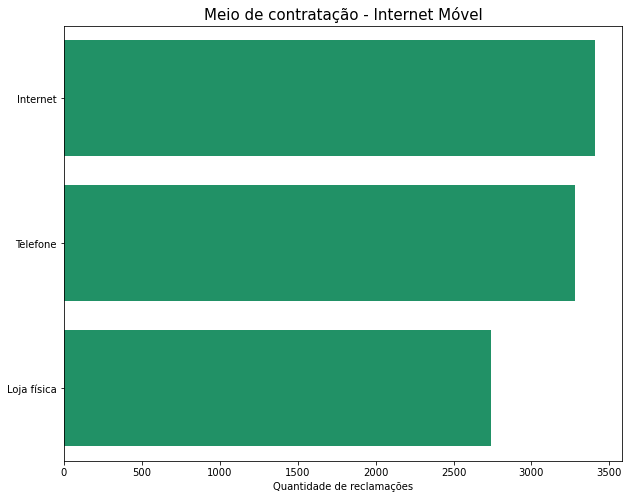

In [26]:
plt.figure(figsize=(10,8))
ax = sns.barplot(internet['Como Comprou Contratou'].value_counts()[:3], 
                 internet['Como Comprou Contratou'].value_counts()[:3].index,
                 color='#0fa36b', orient='h')
plt.xlabel('Quantidade de reclamações')
plt.title('Meio de contratação - Internet Móvel', size=15)

#### Cerca de 80% das aquisições de internet móvel são feitas através de internet, telefone e loja física. Será que esse comportamento depende da faixa etária dos consumidores?

In [27]:
internet.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts()

Faixa Etária        Como Comprou Contratou 
até 20 anos         Internet                    122
                    Telefone                     72
                    Loja física                  69
                    Não comprei / contratei      35
                    SMS / Mensagem de texto       3
                    Domicílio                     2
                    Catálogo                      1
                    Ganhei de presente            1
                    Stand, feiras e eventos       1
entre 21 a 30 anos  Internet                   1229
                    Telefone                    965
                    Loja física                 723
                    Não comprei / contratei     566
                    SMS / Mensagem de texto      69
                    Domicílio                    41
                    Stand, feiras e eventos      28
                    Ganhei de presente           21
                    Catálogo                      8
entre 31 a 40 anos  

Text(0.5, 1.0, 'Meio de contratação de acordo com a faixa etária')

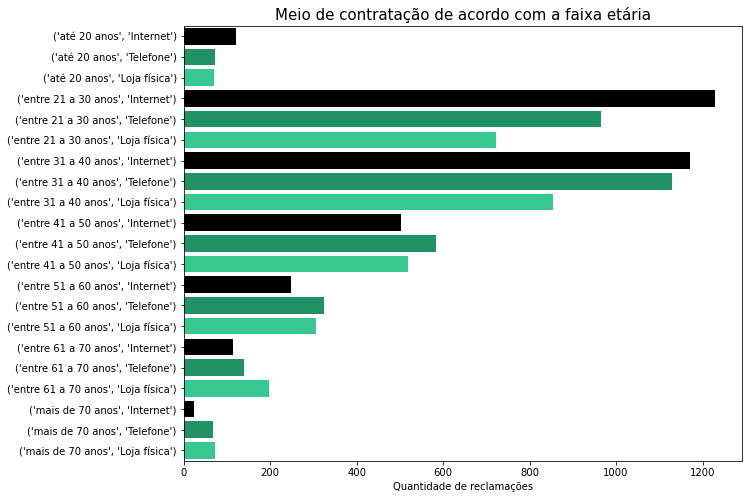

In [28]:
_ = internet.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts()
plt.figure(figsize=(10,8))
ax = sns.barplot(_, _.index,
                 orient='h', order=[
                     ('até 20 anos','Internet'), ('até 20 anos','Telefone'), ('até 20 anos','Loja física'),
                     ('entre 21 a 30 anos', 'Internet'), ('entre 21 a 30 anos', 'Telefone'), ('entre 21 a 30 anos', 'Loja física'),
                     ('entre 31 a 40 anos', 'Internet'), ('entre 31 a 40 anos', 'Telefone'), ('entre 31 a 40 anos', 'Loja física'),
                     ('entre 41 a 50 anos', 'Internet'), ('entre 41 a 50 anos', 'Telefone'), ('entre 41 a 50 anos', 'Loja física'), 
                     ('entre 51 a 60 anos', 'Internet'), ('entre 51 a 60 anos', 'Telefone'), ('entre 51 a 60 anos', 'Loja física'), 
                     ('entre 61 a 70 anos', 'Internet'), ('entre 61 a 70 anos', 'Telefone'), ('entre 61 a 70 anos', 'Loja física'),
                     ('mais de 70 anos', 'Internet'), ('mais de 70 anos', 'Telefone'), ('mais de 70 anos', 'Loja física')],
                palette=['k', '#0fa36b', '#1fe097'])
plt.xlabel('Quantidade de reclamações')
plt.title('Meio de contratação de acordo com a faixa etária', size=15)

#### A partir dos dados, verificca-se que a internet é o meio predominante entre os consumidores que têm até 40 anos. O telefone é o meio mais utilizado entre os consumidores que têm entre 41 a 60 anos. Os consumidores que têm mais de 61 anos contratam principalmente pela loja física.

### H5 - Quais são os principais concorrentes desse serviço?

In [29]:
internet['Nome Fantasia'].value_counts() / internet.shape[0] * 100

Tim                        29.961913
Claro Celular              25.264494
Vivo - Telefônica (GVT)    23.021583
Oi Celular                 12.814219
NET                         3.207787
Nextel                      2.471435
Oi Fixo                     2.082099
SKY                         0.947948
Algar Celular               0.135421
Claro TV                    0.067711
Algar Fixo                  0.025391
Name: Nome Fantasia, dtype: float64

Text(0.5, 1.0, 'Principais concorrentes - Internet Móvel')

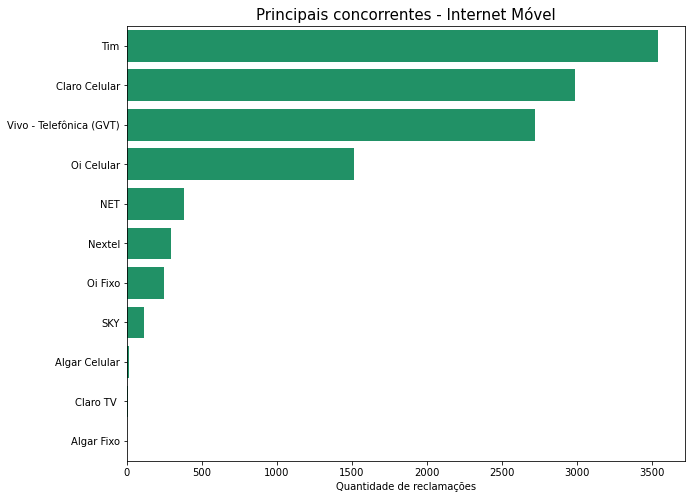

In [30]:
plt.figure(figsize=(10,8))
ax = sns.barplot(internet['Nome Fantasia'].value_counts(), 
                 internet['Nome Fantasia'].value_counts().index,
                 color='#0fa36b', orient='h')
plt.xlabel('Quantidade de reclamações')
plt.title('Principais concorrentes - Internet Móvel', size=15)

### H6 - A quarentena afetou esse serviço?

In [31]:
internet.groupby('Mês')['Total'].count()

Mês
1    1733
2    1509
3    1531
4    1652
5    1701
6    1780
7    1909
Name: Total, dtype: int64

Text(0.5, 1.0, 'Reclamações - Internet Móvel')

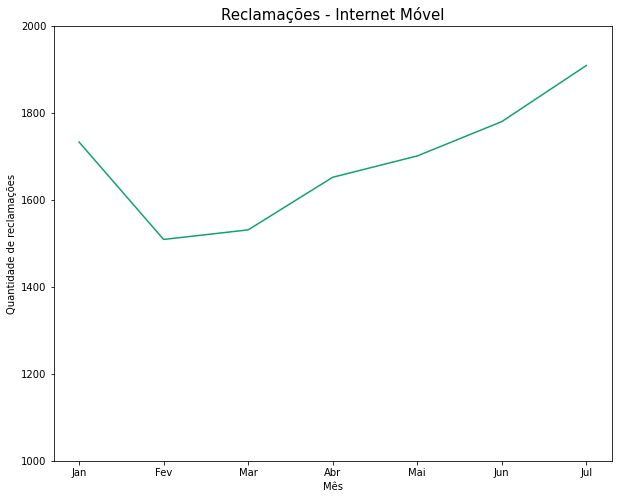

In [32]:
plt.figure(figsize=(10,8))
_ = internet.groupby('Mês')['Total'].count()
sns.lineplot(_.index, _, color='#0fa36b')
plt.ylabel('Quantidade de reclamações')
plt.xlabel('Mês')
plt.xticks([1,2,3,4,5,6,7],['Jan','Fev','Mar','Abr','Mai','Jun','Jul'])
plt.ylim([1000, 2000])
plt.title('Reclamações - Internet Móvel', size=15)

#### A partir de abril, o gráfico apresenta um comportamento de elevação, indicando que as reclamações aumentaram após a quarentena. Isso pode estar relacionado ao aumento da insatisfação ou ao aumento de contratações do serviço.